In [14]:
import pandas as pd
df = pd.read_csv(r'/home/madhu/Desktop/WhatsApp Chat with .txt',
                 names=['date','message'],skiprows=1, encoding='utf-8')

In [15]:
df= df.drop(0)
df.columns=['Date', 'Convo']

In [16]:
Chat = df['Convo'].str.split("-", n=1, expand=True)
df['Time'] = Chat[0]
df['Content'] = Chat[1]

In [17]:
Chat1 = df["Content"].str.split(":", n=1, expand=True)
df['User'] = Chat1[0]
df['Message'] = Chat1[1]

In [18]:
df=df.drop(columns=['Convo'])
df['Message'] = df['Message'].str.lower()
df['Message']=df['Message'].str.replace('<media omitted>', 'Media Shared')
df['Message'] = df['Message'].str.replace('this message was deleted', 'DeletedMsg')

In [19]:
df.to_csv("new_csv.csv",index=False)

In [20]:
import matplotlib.pyplot as mpl
from wordcloud import WordCloud,STOPWORDS

In [21]:
df1=pd.read_csv("new_csv.csv")
stopwords=set(STOPWORDS)
words=''.join(df1.Message.astype(str)).lower()
wordcloud=WordCloud(stopwords=stopwords, min_font_size=10,background_color='white',   width=800,height=800).generate(words)

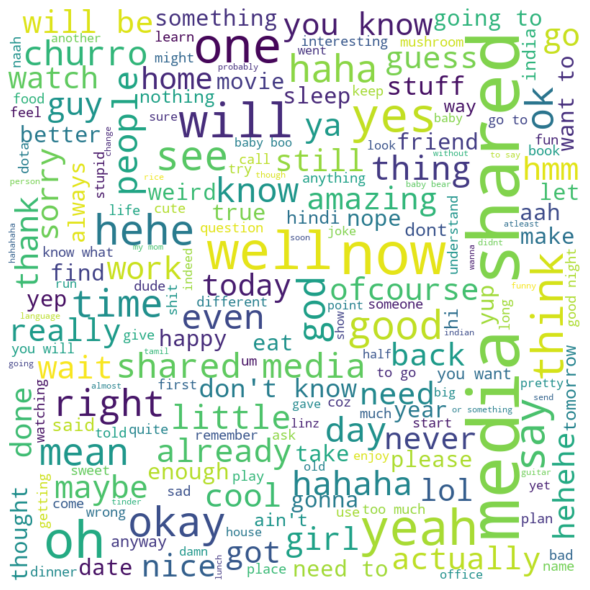

In [22]:
mpl.figure(figsize=(8,8),facecolor=None)
mpl.imshow(wordcloud, interpolation="bilinear")
mpl.axis("off")
mpl.tight_layout(pad=0)
mpl.show()